In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import os
from pathlib import Path
import pandas as pd

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [6]:
aws_csv_path = Path("Resources/news/AMZN.csv")
aws_df = pd.read_csv(aws_csv_path)

aws_df

,Date,Title,Description
0,2022-01-02T10:57:00Z,3 Best Warren Buffett Stocks to Buy for 2022,These three Buffett stocks should be winners i...
1,2022-01-02T11:00:00Z,Here's My Favorite SaaS Stock to Buy Right Now...,This company is a leader in digital transforma...
2,2022-01-02T11:05:00Z,The Most Important Retirement Chart You'll See...,Investment income has changed -- make sure you...
3,2022-01-02T11:07:00Z,"Where to Invest $100,000 in 2022",The goal: a portfolio that should pay off well...
4,2022-01-02T11:24:00Z,Will Alibaba Be Worth More Than Amazon by 2030?,"The ""Amazon of China"" is still a lot smaller t..."
...,...,...,...
2500,2022-05-31T20:05:53Z,Johnny Depp Hollywood Comeback Could Be 'Beetl...,"Even after he lost roles in several movies, if..."
2501,2022-05-31T20:23:00Z,Tesla short sellers have made nearly $7 billio...,Betting against megacap tech stocks has been o...
2502,2022-05-31T20:32:00Z,Here’s what’s new on Amazon’s Prime Video in J...,"‘The Boys’ are back and darker than ever, alon..."
2503,2022-05-31T20:51:00Z,Here's what's worth streaming in June 2022 -- ...,The streaming schedule barely slows down as su...


In [17]:
aws_news = [''.join(aws) for aws in aws_df["Description"]]
aws_big_string = ' '.join(aws_news)


In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'say','though','some','wouldn\'t', 'take','all','also','found','still'}

In [10]:
def tokenizer(text):
    """
    Tokenizes the text
    Second parameter is function overide param utilized to get list of tokens from the text 
    or 
    obtain big string of tokens separated by spaces.
    """
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return ' '.join(tokens)

In [15]:
aws_news_token = tokenizer(aws_big_string)

In [16]:
aws_news_token

'three buffett stock winner new year company leader digital transformation yet trade relative bargain sector investment income ha changed make sure retirement plan address goal portfolio pay well future amazon china lot smaller american counterpart ecommerce platform provider ha grown rapidly online shopping online payment platform ha hit ball park new year beyond preference towards growth investing consider balanced approach read article check favorite growth stock pick spiderman way maintained domination us box office third consecutive weekend bringing million screenswhat happened sony pictures nyse sony release ha grossed million domestic box office since premiere making th highest grossing us film release cinema historynone weekend top five box office release came close number generated spiderman way second place sing comcasts nasdaq cmcsa universal pictures brought million theater third place kings man walt disney cos nyse dis th century studios generated million theater american 

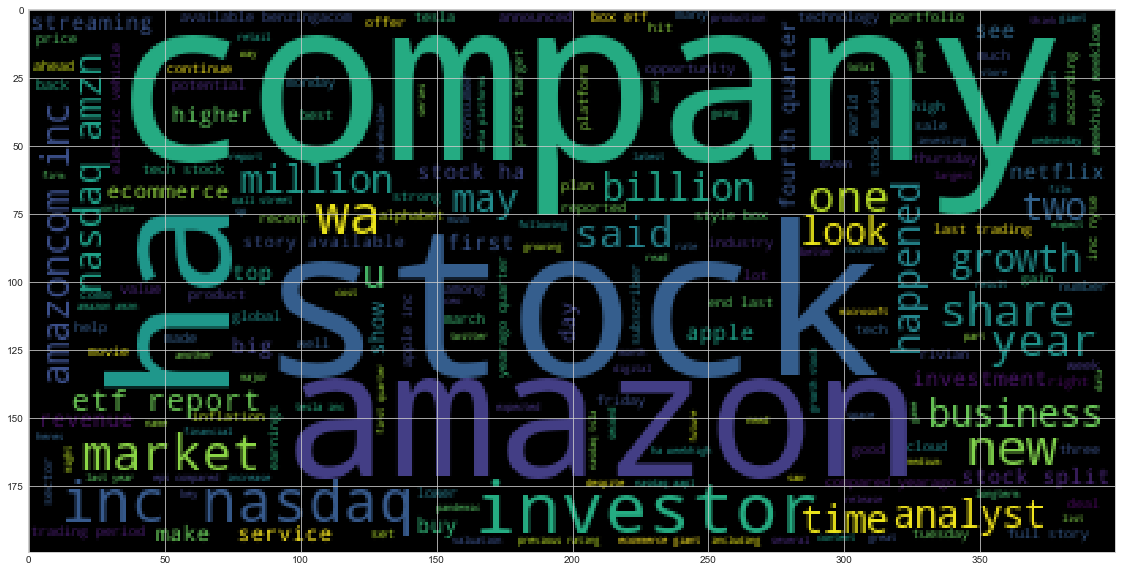

In [18]:
# Generate Word Cloud
aws_wc = WordCloud().generate(aws_news_token)
plt.imshow(aws_wc)